## Check the pervoskite experimental data produced on Sep 22, 2020

- Experiments are prepared by Nick Rolston and Thomas Colburn (Stanfrod University) 
- Jupyter Notebook is prepared by Zhe Liu (Massachusetts Insititute of Technology)


In [2]:
import numpy as np
import pandas as pd
import emukit
import GPy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_film = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_09_22_film')
print(df_film.columns)
df_film.iloc[:,:-1]

Index(['ML Condition', 'Temp [degC]', 'speed [mm/s]', 'sprayFL [uL/min]',
       'plamsaH [cm]', 'gasFL [L/min]', 'plasmaDC [%]', '  Success or Fail',
       'Unnamed: 8'],
      dtype='object')


,ML Condition,Temp [degC],speed [mm/s],sprayFL [uL/min],plamsaH [cm],gasFL [L/min],plasmaDC [%],Success or Fail
0,0,155,200,5000,1.2,35,50,1
1,1,160,225,3000,0.8,30,75,0
2,2,135,200,2500,1.0,25,75,1
3,3,150,175,2000,1.0,20,100,0
4,4,170,275,4500,1.2,16,50,0
5,5,175,250,3500,1.2,25,75,0
6,6,140,150,4000,1.0,20,75,1
7,7,155,225,4000,0.8,30,25,0
8,8,130,175,3500,0.8,25,75,1
9,9,135,125,2500,1.2,20,25,1


In [4]:
df_device = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_09_22_device')
print(df_device.columns)
df_device.columns = ['ML Condition', 'Sample', 'Temp [degC]', 'speed [mm/s]',
       'sprayFL [uL/min]', 'plamsaH [cm]', 'gasFL [L/min]', 'plasmaDC [%]',
       'Isc [mA]', 'Jsc [mA/cm2]', 'Voc [V]', 'FF [-]', 'Efficiency [%]']
df_device


Index(['ML Condition', 'Sample', 'Temp [degC]', 'speed [mm/s]',
       'sprayFL [uL/min]', 'plamsaH [cm]', 'gasFL [L/min]', 'plasmaDC [%]',
       'Isc', 'Jsc', 'Voc', 'FF', 'PCE'],
      dtype='object')


,ML Condition,Sample,Temp [degC],speed [mm/s],sprayFL [uL/min],plamsaH [cm],gasFL [L/min],plasmaDC [%],Isc [mA],Jsc [mA/cm2],Voc [V],FF [-],Efficiency [%]
0,6,B9R_14-FR0.dat,140,150,4000,1.0,20,75,3.996,19.0280,1.046000,0.59,11.743293
1,6,B9L_4-FR0.dat,140,150,4000,1.0,20,75,3.553,16.9190,1.044000,0.58,10.244822
2,6,B10L_7-FR0.dat,140,150,4000,1.0,20,75,3.820,18.1900,1.040000,0.67,12.675124
3,6,B10R_AFTERUP2-FR0.dat,140,150,4000,1.0,20,75,4.181,19.9090,1.023000,0.69,14.053536
4,15,B11L_YELLOWISH2-FR0.dat,125,275,3000,0.8,20,50,4.773,22.7285,0.981303,0.61,13.605205
5,15,B11R_YELLOWISH2-FR0.dat,125,275,3000,0.8,20,50,4.844,23.0660,0.921332,0.58,12.326194
6,15,B12L-FR0.dat,125,275,3000,0.8,20,50,4.458,21.2280,0.832519,0.59,10.427182
7,15,B12RPALE_2-FR0.dat,125,275,3000,0.8,20,50,4.504,21.4476,0.818877,0.62,10.889036
8,10,B13R_5-FR0.dat,130,250,4500,1.2,30,50,4.644,22.1142,0.945775,0.59,12.339932
9,10,B14L_YELLOWISH4-FR0.dat,130,250,4500,1.2,30,50,4.267,20.3190,0.966675,0.62,12.177988


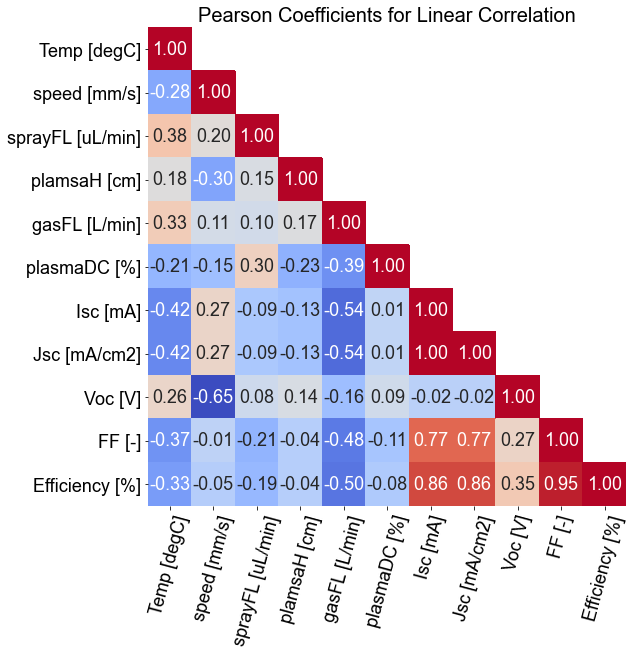

In [5]:
df = df_device.iloc[:,2:]
df_cols = df.columns

corr = df.corr(method='pearson')#'spearman'
corr.columns = df_cols
df_len = len(df_cols)
fs = 18


fig, ax=plt.subplots(figsize=(df_len*0.8,df_len*0.8))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr, mask = mask, cbar_kws={"shrink": .2}, annot=True, fmt='.2f', 
            cmap=cmap, cbar=False, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
ax.set_title("Pearson Coefficients for Linear Correlation", fontsize = 20)
plt.xticks(rotation=75, fontsize = fs)
plt.yticks(rotation=0, fontsize = fs) 
plt.show()

### Visualize input data distribution as histogram

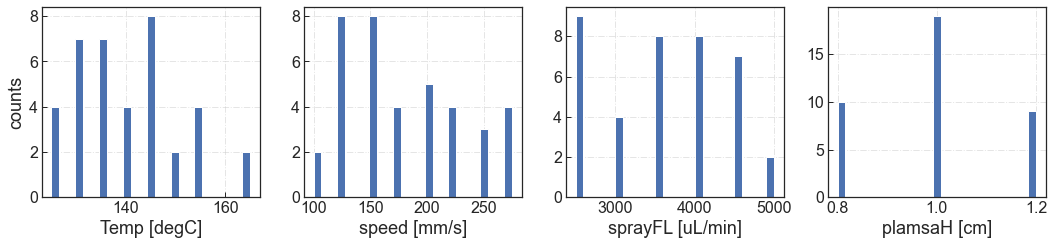

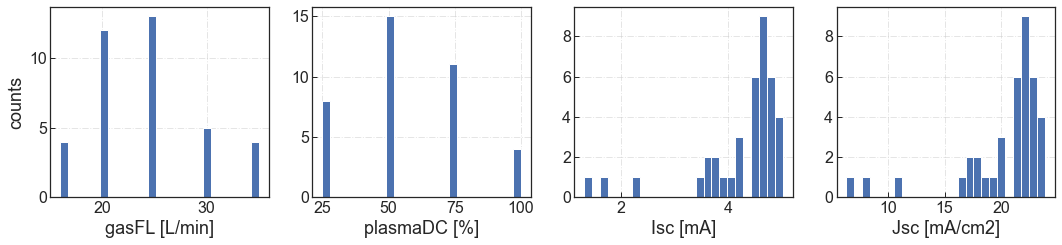

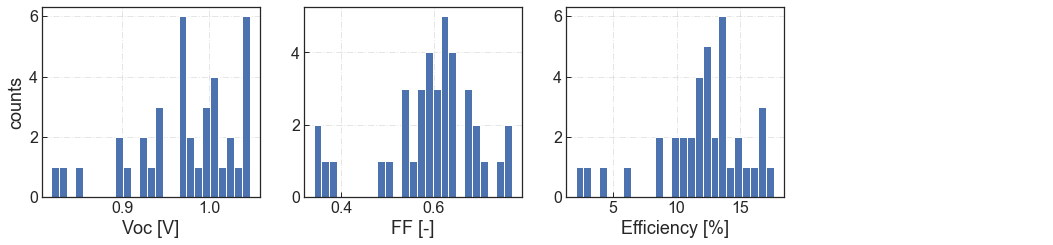

In [13]:
df = df_device.iloc[:,2:]
df_cols = df.columns
n_col = 4 # num of columns per row in the figure

for n in np.arange(0, 12, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            axes[i].hist(df.iloc[:,n], bins=25)####
            axes[i].set_xlabel(df_cols[n], fontsize = 18)
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

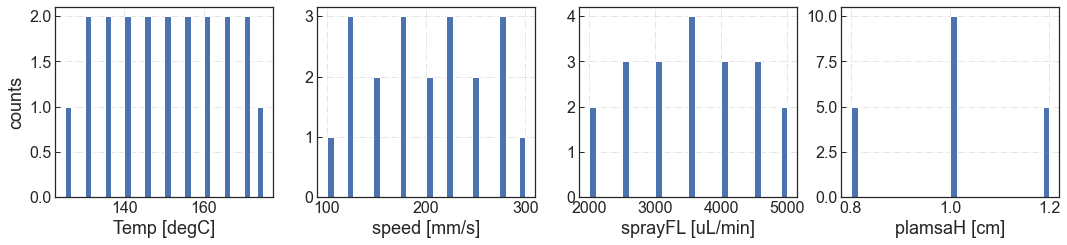

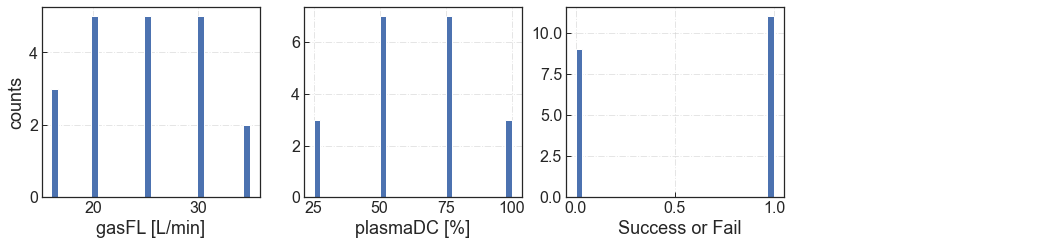

In [19]:
df = df_film.iloc[:,1:-1]
df_cols = df.columns
n_col = 4 # num of columns per row in the figure

for n in np.arange(0, 8, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            axes[i].hist(df.iloc[:,n], bins=30)####
            axes[i].set_xlabel(df_cols[n], fontsize = 18)
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

### Visualize the partial/marginalized dependence as scatter plot

The color is for variable speed [mm/s] with red as the highest and blue as the lowest


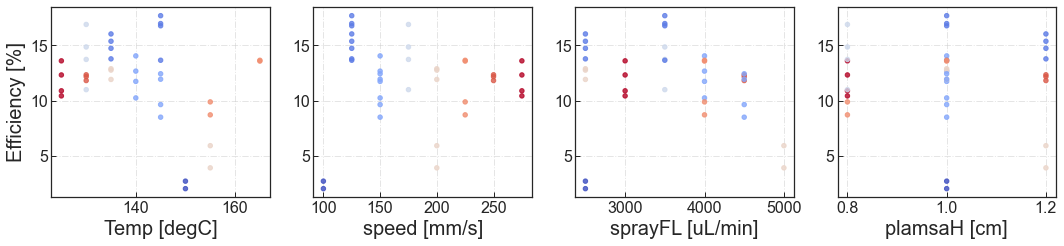

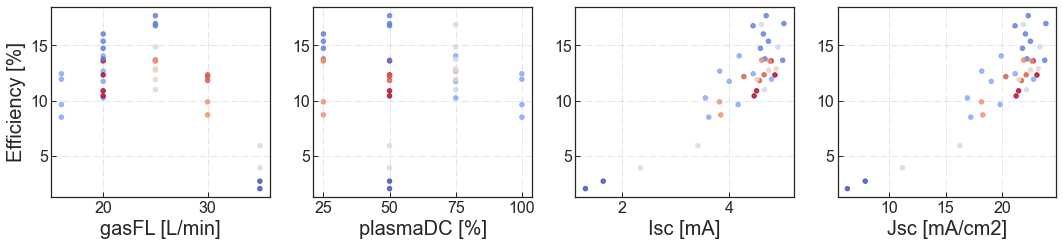

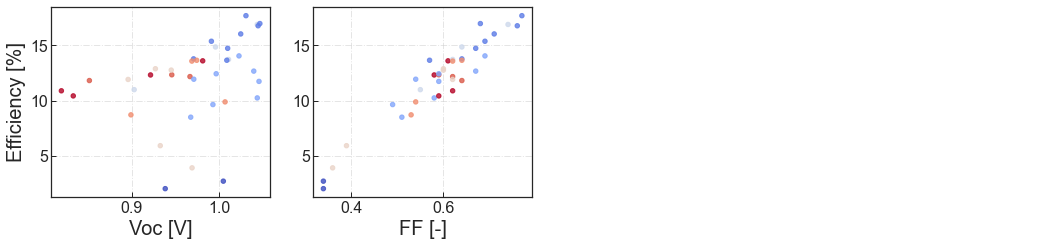

In [7]:
df = df_device.iloc[:,2:]

n_col = 4 # num of columns per row in the figure
y_indx = -1 #PCE (efficiency%)
color_indx = 1 #
column_names = df.columns.values
fs = 20

cmap = plt.get_cmap('coolwarm', 10)
print("The color is for variable", column_names[color_indx], "with red as the highest and blue as the lowest")

for n in np.arange(0, 12, n_col):
        fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
        for i in np.arange(n_col):
            #print(n)
            if n< len(column_names)-1:
                im = axes[i].scatter(df.iloc[:,n],df.iloc[:,y_indx], 
                                     c=df.iloc[:,color_indx], s = 20, cmap=cmap, alpha =0.8, edgecolors = 'face')
                axes[i].set_xlabel(column_names[n], fontsize = fs)
            else:
                axes[i].axis("off")
                #axes[i].set_title(sf_cols[n])
            n = n+1      
        axes[0].set_ylabel(column_names[y_indx], fontsize = fs)
        for i in range(len(axes)):
            axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            axes[i].grid(True, linestyle='-.')
        plt.show()

The color is for variable speed [mm/s] with red as the highest and blue as the lowest


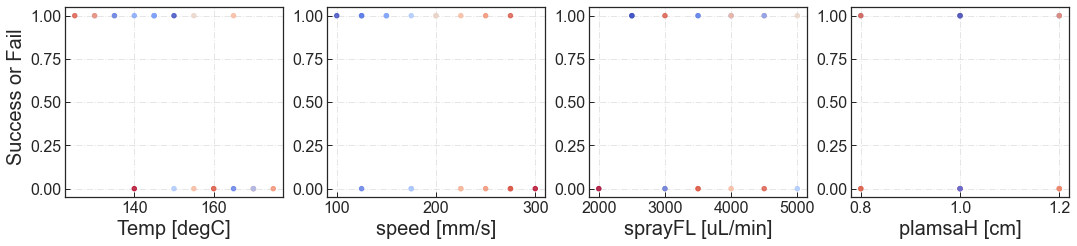

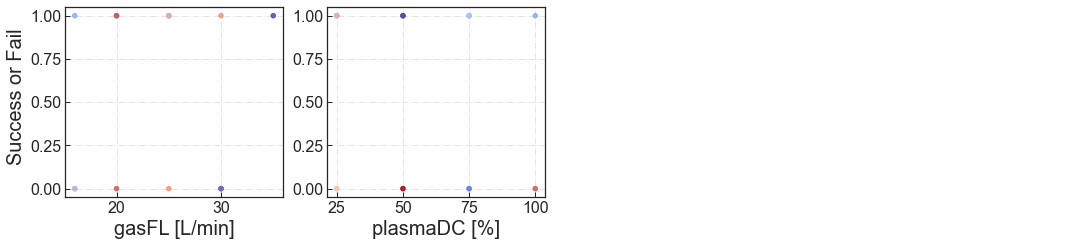

In [8]:
df = df_film.iloc[:,1:-1]

n_col = 4 # num of columns per row in the figure
y_indx = -1 #PCE (efficiency%)
color_indx = 1 #
column_names = df.columns.values
fs = 20

cmap = plt.get_cmap('coolwarm', 10)
print("The color is for variable", column_names[color_indx], "with red as the highest and blue as the lowest")

for n in np.arange(0, 8, n_col):
        fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
        for i in np.arange(n_col):
            #print(n)
            if n< len(column_names)-1:
                im = axes[i].scatter(df.iloc[:,n],df.iloc[:,y_indx], 
                                     c=df.iloc[:,color_indx], s = 20, cmap=cmap, alpha =0.8, edgecolors = 'face')
                axes[i].set_xlabel(column_names[n], fontsize = fs)
            else:
                axes[i].axis("off")
                #axes[i].set_title(sf_cols[n])
            n = n+1      
        axes[0].set_ylabel(column_names[y_indx], fontsize = fs)
        for i in range(len(axes)):
            axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            axes[i].grid(True, linestyle='-.')
        plt.show()

### Reduce the Data Complexity - Dimensionality Reduction using tSNE
- t-Student Stochastic Embedding (tSNE, tee-s-nee)
- More readings about `tSNE` vs `PCA` at this blog post: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1


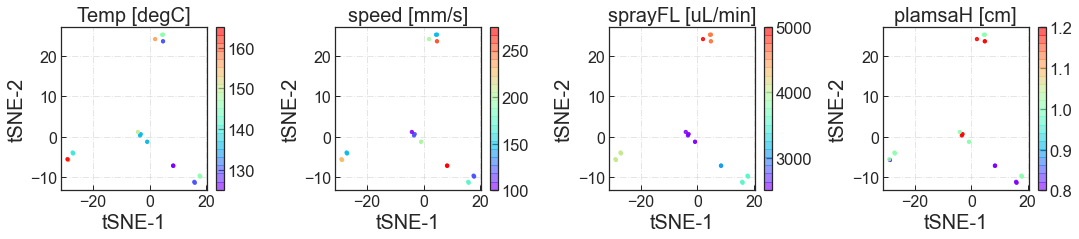

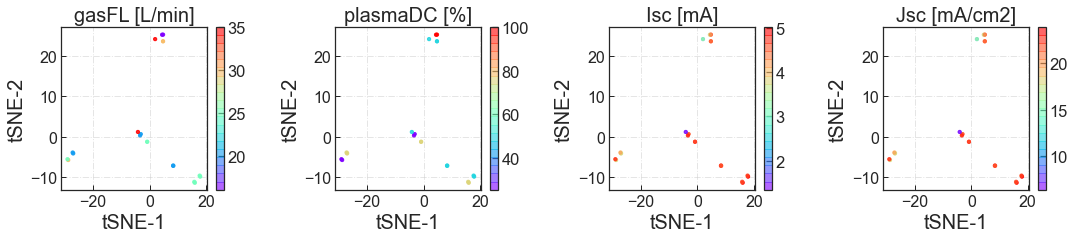

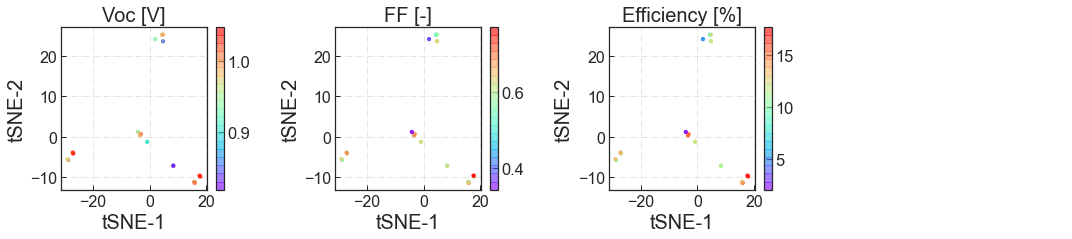

In [9]:
df = df_device.iloc[:,2:]

from sklearn.manifold import TSNE
tsne_2d_model = TSNE(n_components=2, init='random', random_state = 5,
                     learning_rate=5, perplexity = 5, n_iter = 1000) #perplexity is the key hyperparameter to tune
X_tsne_2d = tsne_2d_model.fit_transform(df.iloc[:,:-1].values)

n_col = 4 # num of columns per row in the figure
column_names = df.columns.values
for n in np.arange(0, 12, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3), sharey = False)
    cmap = plt.get_cmap('rainbow', 20)
    for i in np.arange(n_col):
        if n< len(column_names):
            c = df.iloc[:,n]# Choose which column is shown as the superimposed color
            im = axes[i].scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], 
                                 marker = 'o', c=c, cmap=cmap, alpha =0.6, edgecolors = 'face', s = 10)
            title = column_names[n]
            axes[i].set_title(''+title, fontsize = fs)
            fig.colorbar(im, ax=axes[i], drawedges=False)
            axes[i].set_xlabel('tSNE-1', fontsize = fs)
            axes[i].set_ylabel('tSNE-2', fontsize = fs)
        else:
            axes[i].axis("off")     
        n = n+1  
        
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.subplots_adjust(wspace = 0.5)
    plt.show()